In [1]:
import pandas as pd
pd.set_option('max_columns', None)
collisions = pd.read_csv("../data/NYPD_Motor_Vehicle_Collisions_2016.csv", index_col=0)

In [2]:
%matplotlib inline

In [4]:
collisions.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/10/2016,15:11,NaN,NaN,NaN,NaN,NaN,MONROE STREET,NaN,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3559084,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,04/16/2016,4:13,NaN,NaN,40.767373,-73.950057,"(40.767373, -73.9500574)",EAST 68 STREET,NaN,NaN,1,0,0,0,0,0,1,0,Fatigued/Drowsy,Fatigued/Drowsy,Fatigued/Drowsy,NaN,NaN,3408932,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
2,04/16/2016,4:22,NaN,NaN,NaN,NaN,NaN,BORDEN AVENUE,58TH STREET,NaN,1,0,1,0,0,0,0,0,Passenger Distraction,NaN,NaN,NaN,NaN,3425902,NaN,NaN,NaN,NaN,NaN
3,04/16/2016,4:30,BRONX,10468.0,40.862679,-73.909040,"(40.8626793, -73.9090397)",SEDGWICK AVENUE,WEST FORDHAM ROAD,NaN,0,0,0,0,0,0,0,0,Alcohol Involvement,NaN,NaN,NaN,NaN,3414396,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
4,04/16/2016,4:30,BROOKLYN,11249.0,40.716508,-73.961275,"(40.7165078, -73.9612751)",NaN,NaN,203 BERRY STREET,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3421852,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


What's the easiest tool to use? `pandas`. You've already got it!

In [114]:
df = collisions['BOROUGH'].value_counts(dropna=False)
df

NaN              66479
BROOKLYN         44170
QUEENS           38266
MANHATTAN        34223
BRONX            20034
STATEN ISLAND     6192
Name: BOROUGH, dtype: int64

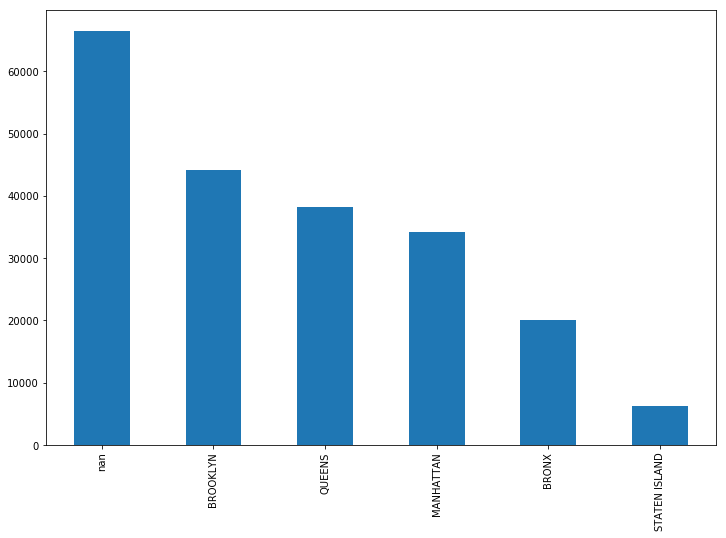

In [115]:
df.plot.bar(figsize=(12, 8))

In [3]:
df = (collisions
          .groupby(['CONTRIBUTING FACTOR VEHICLE 1', 'NUMBER OF PERSONS INJURED'])
          .count()
          .loc[:, 'DATE']
          .rename('COUNT(COLLISIONS)')
          .to_frame()
          .unstack('NUMBER OF PERSONS INJURED')
     )

df.columns = df.columns.droplevel(0)

df = (df.rename_axis("INJURIES", axis='columns')
        .rename_axis("CONTRIBUTING FACTOR", axis='rows')
        .apply(lambda srs: srs.drop(srs.iloc[3:].index.values), axis=1)
        .fillna(0)
        .drop("Unspecified")
        .sort_values(by=0, ascending=False)
        .head(5))
df.head()

INJURIES,0,1,2
CONTRIBUTING FACTOR,,,
Driver Inattention/Distraction,20704.0,3900.0,694.0
Failure to Yield Right-of-Way,5152.0,2002.0,357.0
Backing Unsafely,4614.0,350.0,30.0
Fatigued/Drowsy,4346.0,661.0,191.0
Following Too Closely,4029.0,822.0,233.0


Note: for the purposes of demonstration we're simplifying here and excluding crashes with more than two injuries.

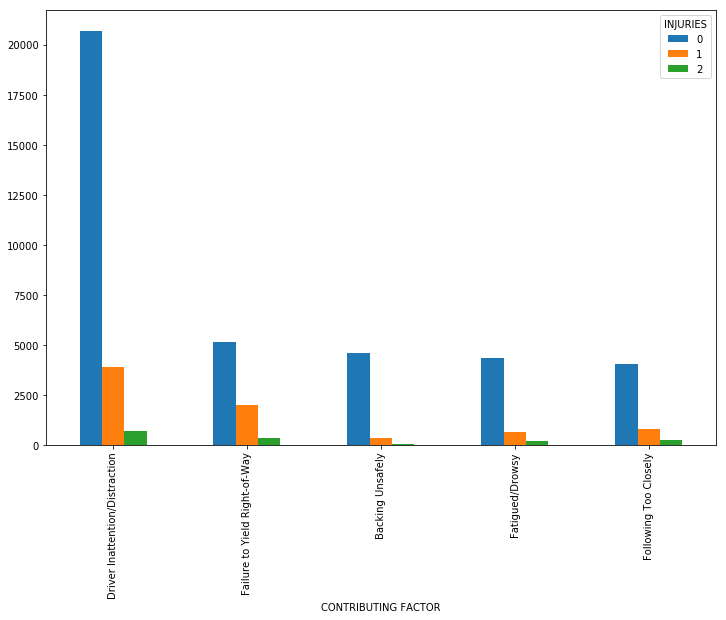

In [4]:
df.plot.bar(figsize=(12,8))

In [130]:
df = (collisions.groupby('ZIP CODE')
        .sum()
        .loc[:, 'NUMBER OF PERSONS INJURED']
        .rename('COUNT(COLLISIONS)'))
df.head()

ZIP CODE
10000.0     23
10001.0    232
10002.0    357
10003.0    222
10004.0     24
Name: COUNT(COLLISIONS), dtype: int64

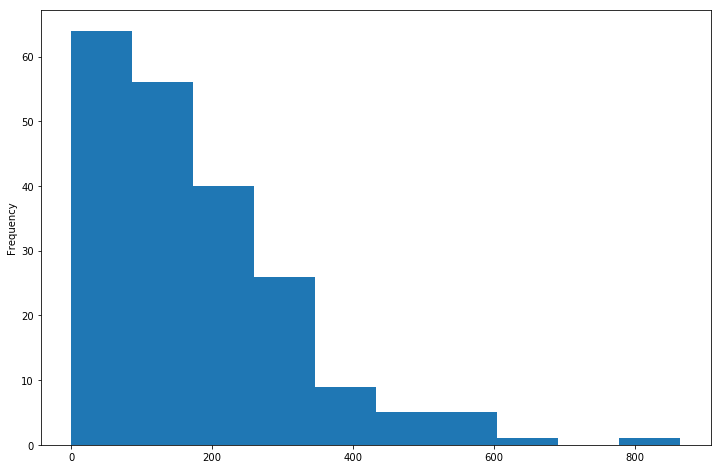

In [132]:
df.plot.hist(figsize=(12,8))

In [168]:
df = collisions[['CONTRIBUTING FACTOR VEHICLE 1', 'NUMBER OF PERSONS INJURED']]
df = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

subsrs = []
df.groupby('CONTRIBUTING FACTOR VEHICLE 1')\
    .apply(lambda df: subsrs.append(pd.Series(df['NUMBER OF PERSONS INJURED'].values, name=df.name)))
    
df = pd.concat(subsrs, axis='columns')

df.head()

,Accelerator Defective,Aggressive Driving/Road Rage,Alcohol Involvement,Animals Action,Backing Unsafely,Brakes Defective,Cell Phone (hand-held),Cell Phone (hands-free),Driver Inattention/Distraction,Driver Inexperience,Driverless/Runaway Vehicle,Drugs (Illegal),Failure to Keep Right,Failure to Yield Right-of-Way,Fatigued/Drowsy,Fell Asleep,Following Too Closely,Glare,Headlights Defective,Illness,Lane Marking Improper/Inadequate,Lost Consciousness,Obstruction/Debris,Other Electronic Device,Other Lighting Defects,Other Vehicular,Outside Car Distraction,Oversized Vehicle,Passenger Distraction,Passing or Lane Usage Improper,Pavement Defective,Pavement Slippery,Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,Physical Disability,Prescription Medication,Reaction to Other Uninvolved Vehicle,Shoulders Defective/Improper,Steering Failure,Tire Failure/Inadequate,Tow Hitch Defective,Traffic Control Device Improper/Non-Working,Traffic Control Disregarded,Turning Improperly,Unsafe Lane Changing,Unsafe Speed,View Obstructed/Limited,Windshield Inadequate
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


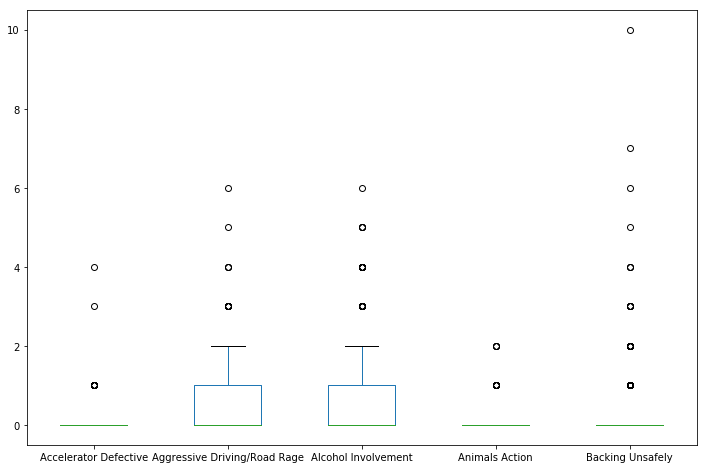

In [177]:
df.iloc[:, :5].plot.box(figsize=(12, 8))

In [179]:
collisions['DATE'] = pd.to_datetime(collisions['DATE'])

In [187]:
# collisions.groupby(['DATE', 'BOROUGH']).count()['LOCATION'].rename('COUNT(COLLISIONS)')
# Note: this is a good example for a data munging talk.

In [186]:
# pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

In [206]:
df = (collisions
         .groupby(['DATE', 'BOROUGH'])
         .count()
         .loc[:, 'LOCATION']
         .rename('COUNT(COLLISIONS)')
         .unstack('BOROUGH')
         .head(365 // 2))

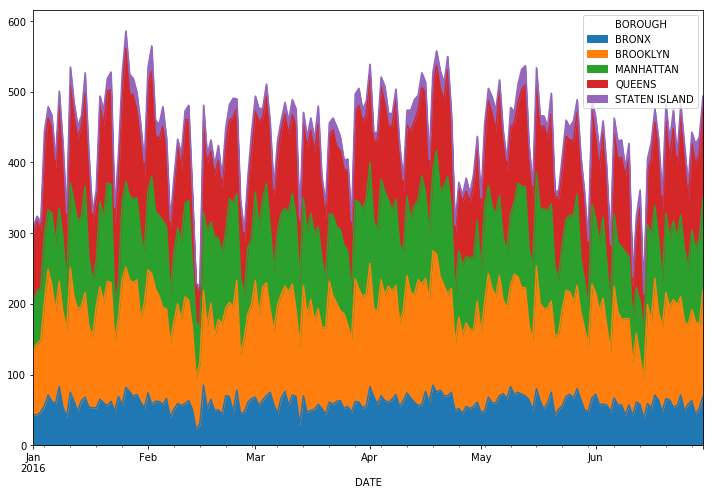

In [207]:
df.plot.area(figsize=(12, 8))

* Bar Plot
* Histogram
* Pie Chart
* Area Plot
* Scatter Plot
* Box Plot
* Hexbin Plot
* KDE Density Plot
* Andrews Curve
* Parallel Coordinates Plot
* Lag Plot
* Autocorrelation Plot
* Bootstrap Plot
* Rad Viz

But `pandas` plotting tools require that your data be shaped "just right" in order for them to work.

Case in point, the box plot data.

In [211]:
df = collisions[['CONTRIBUTING FACTOR VEHICLE 1', 'NUMBER OF PERSONS INJURED']]
df = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

subsrs = []
df.groupby('CONTRIBUTING FACTOR VEHICLE 1')\
    .apply(lambda df: subsrs.append(pd.Series(df['NUMBER OF PERSONS INJURED'].values, name=df.name)))
    
df = pd.concat(subsrs, axis='columns')

Looks fine at first...

In [212]:
df.head()

,Accelerator Defective,Aggressive Driving/Road Rage,Alcohol Involvement,Animals Action,Backing Unsafely,Brakes Defective,Cell Phone (hand-held),Cell Phone (hands-free),Driver Inattention/Distraction,Driver Inexperience,Driverless/Runaway Vehicle,Drugs (Illegal),Failure to Keep Right,Failure to Yield Right-of-Way,Fatigued/Drowsy,Fell Asleep,Following Too Closely,Glare,Headlights Defective,Illness,Lane Marking Improper/Inadequate,Lost Consciousness,Obstruction/Debris,Other Electronic Device,Other Lighting Defects,Other Vehicular,Outside Car Distraction,Oversized Vehicle,Passenger Distraction,Passing or Lane Usage Improper,Pavement Defective,Pavement Slippery,Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,Physical Disability,Prescription Medication,Reaction to Other Uninvolved Vehicle,Shoulders Defective/Improper,Steering Failure,Tire Failure/Inadequate,Tow Hitch Defective,Traffic Control Device Improper/Non-Working,Traffic Control Disregarded,Turning Improperly,Unsafe Lane Changing,Unsafe Speed,View Obstructed/Limited,Windshield Inadequate
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


...but if you look at the bottom, you'll see that in reality, most entries are empty.

In [216]:
df.tail()

,Accelerator Defective,Aggressive Driving/Road Rage,Alcohol Involvement,Animals Action,Backing Unsafely,Brakes Defective,Cell Phone (hand-held),Cell Phone (hands-free),Driver Inattention/Distraction,Driver Inexperience,Driverless/Runaway Vehicle,Drugs (Illegal),Failure to Keep Right,Failure to Yield Right-of-Way,Fatigued/Drowsy,Fell Asleep,Following Too Closely,Glare,Headlights Defective,Illness,Lane Marking Improper/Inadequate,Lost Consciousness,Obstruction/Debris,Other Electronic Device,Other Lighting Defects,Other Vehicular,Outside Car Distraction,Oversized Vehicle,Passenger Distraction,Passing or Lane Usage Improper,Pavement Defective,Pavement Slippery,Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,Physical Disability,Prescription Medication,Reaction to Other Uninvolved Vehicle,Shoulders Defective/Improper,Steering Failure,Tire Failure/Inadequate,Tow Hitch Defective,Traffic Control Device Improper/Non-Working,Traffic Control Disregarded,Turning Improperly,Unsafe Lane Changing,Unsafe Speed,View Obstructed/Limited,Windshield Inadequate
25650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Taking a closer look:

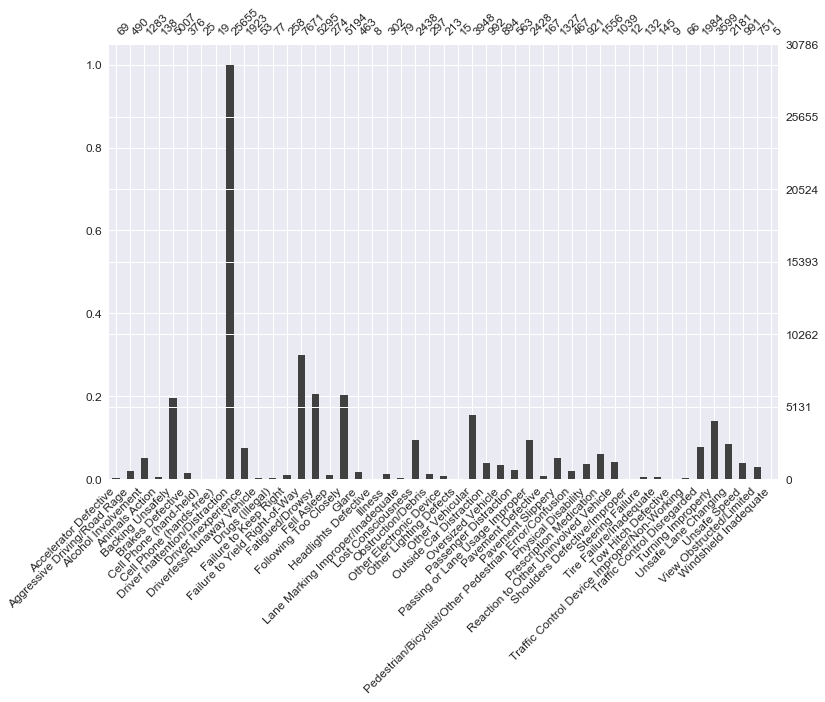

In [215]:
import missingno as msno
msno.bar(df, figsize=(12,8), fontsize=12)

What we have here is data that's mostly empty!

Our original dataset is organized in terms of records: each collision is a single entry in our data. This makes sense because collision reports are individual records filed one-at-a-time into a database somewhere, which is then exposed to us as a CSV.

What we've done is pivot the part of the data that we need into what's known as a "long" format.

In some cases it makes sense to have your data in a long format. For example, the area chart we generated uses collisions which occurred in each of the boroughs on each day of the first half of the year 2016, organized into the same "long" format:

In [217]:
df = (collisions
         .groupby(['DATE', 'BOROUGH'])
         .count()
         .loc[:, 'LOCATION']
         .rename('COUNT(COLLISIONS)')
         .unstack('BOROUGH')
         .head(365 // 2))

df.head()

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
DATE,,,,,
2016-01-01,43,95,66,97,9
2016-01-02,43,100,76,98,7
2016-01-03,47,102,73,82,12
2016-01-04,56,148,94,124,23
2016-01-05,71,178,84,130,16


This makes sense, because *some* accidents occur on every day of the year, so all of our records are filled:

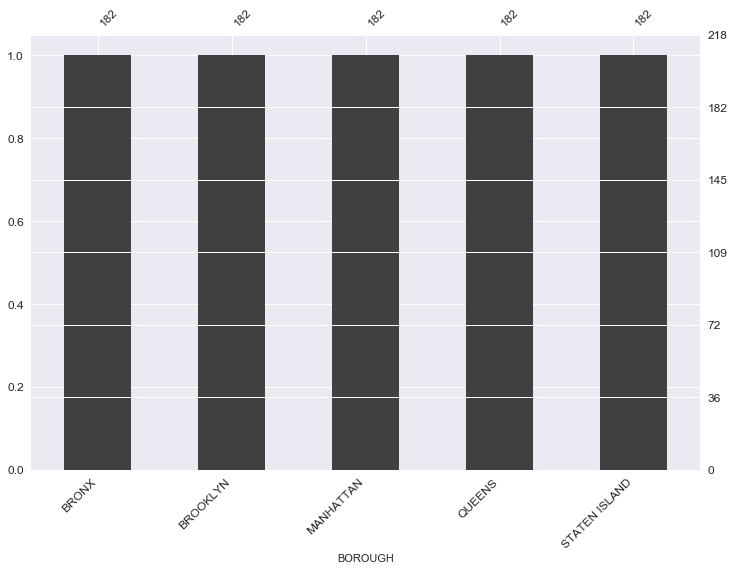

In [218]:
import missingno as msno
msno.bar(df, figsize=(12,8), fontsize=12)

It makes a lot *less* sense in the case of our injury-by-factor data, because in that data the number of collisions attributed at all per-factor varies wildly.

But in order to create that box plot, `pandas` *enforced* that we have our data in a long format.

This in turn required an awkward and complicated transformation to make it so.

That's counterproductive; the difficulty of writing the necessary data munging code is an unnecessary distraction and something that makes you more likely to do something easier instead, like throw a bunch of `pd.DataFrame.value_count()` calls down, which won't be as insightful but is easier to do.

So I've outlined a problem here: `pandas` plotting tools hoist data formats on us that we might not necessarily like. How can this be addressed?

Well, the key insights is that most of the data that we work with "in the wild" comes to us in the form of records. In other words, it looks something like our entire collisions dataset at large:

In [219]:
collisions.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2016-11-10,15:11,NaN,NaN,NaN,NaN,NaN,MONROE STREET,NaN,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3559084,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,2016-04-16,4:13,NaN,NaN,40.767373,-73.950057,"(40.767373, -73.9500574)",EAST 68 STREET,NaN,NaN,1,0,0,0,0,0,1,0,Fatigued/Drowsy,Fatigued/Drowsy,Fatigued/Drowsy,NaN,NaN,3408932,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
2,2016-04-16,4:22,NaN,NaN,NaN,NaN,NaN,BORDEN AVENUE,58TH STREET,NaN,1,0,1,0,0,0,0,0,Passenger Distraction,NaN,NaN,NaN,NaN,3425902,NaN,NaN,NaN,NaN,NaN
3,2016-04-16,4:30,BRONX,10468.0,40.862679,-73.909040,"(40.8626793, -73.9090397)",SEDGWICK AVENUE,WEST FORDHAM ROAD,NaN,0,0,0,0,0,0,0,0,Alcohol Involvement,NaN,NaN,NaN,NaN,3414396,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
4,2016-04-16,4:30,BROOKLYN,11249.0,40.716508,-73.961275,"(40.7165078, -73.9612751)",NaN,NaN,203 BERRY STREET,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3421852,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


Enter `seaborn`.

In [221]:
# from IPython.display import Image
# Image("../figures/enter_the_matrix.gif")